Found 231 images belonging to 2 classes.
Found 57 images belonging to 2 classes.
Epoch 1/50


C:\Users\skiri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.6483 - loss: 0.6974 - val_accuracy: 0.8070 - val_loss: 0.3998
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.8375 - loss: 0.4007 - val_accuracy: 0.8246 - val_loss: 0.4372
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.8399 - loss: 0.4064 - val_accuracy: 0.8772 - val_loss: 0.3235
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.8791 - loss: 0.3009 - val_accuracy: 0.8246 - val_loss: 0.3674
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.9156 - loss: 0.2608 - val_accuracy: 0.9123 - val_loss: 0.2597
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.9316 - loss: 0.1961 - val_accuracy: 0.9123 - val_loss: 0.2590
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.9173 - loss: 0.1719 - val_accuracy: 0.9474 - val_loss: 0.1733
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.9617 - loss: 0.1252 - val_accuracy: 0.9474 - val_loss: 0.1505
Epo

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step - accuracy: 0.9662 - loss: 0.0465
Validation accuracy: 0.96


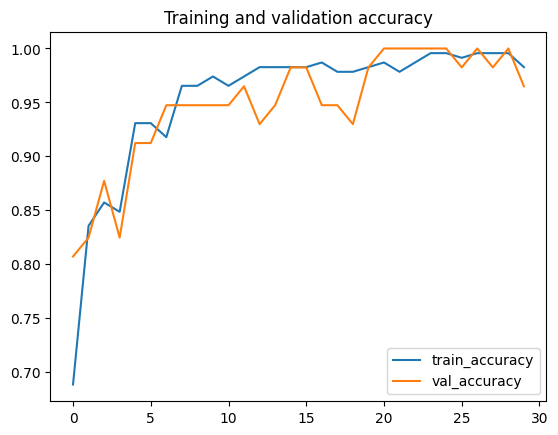

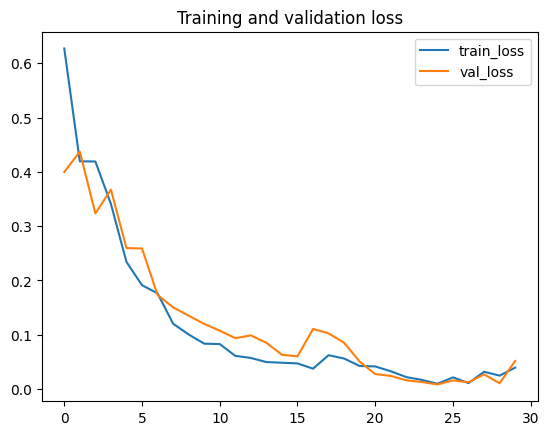

In [6]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set the dataset directory
dataset_dir = r"D:\Mithu tomato\Tomato_Ripeness_detection\dataset"

# Parameters
img_width, img_height = 128, 128
batch_size = 32
epochs = 50
input_shape = (img_width, img_height, 3)

# Data Preprocessing using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize the image pixel values to [0, 1]
    validation_split=0.2 # Reserve 20% of images for validation
)

# Load the training set
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', # Assuming binary classification (ripe/unripe)
    subset='training'
)

# Load the validation set
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the results to feed into a fully connected (dense) layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization to prevent overfitting

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
checkpoint = ModelCheckpoint('tomato_ripeness_model.keras', monitor='val_loss', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping]
)

# Save the final model as .h5
model.save('tomato_ripeness_final_model.h5')

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc:.2f}")

# Plot the training and validation accuracy/loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [7]:
# Print accuracy as a percentage
print(f"Validation accuracy: {val_acc * 100:.2f}%")

Validation accuracy: 96.49%
